In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

## Skin BGR Bounds

* Very Light
```python
lo = np.array([200, 200, 0])
hi = np.array([255, 255, 255])
```
* Light
```python
lo = np.array([150, 150, 0])
hi = np.array([200, 200, 255])
```
* Not Light
```python
lo = np.array([100, 100, 0])
hi = np.array([150, 150, 255])
```


In [2]:
def experiment(key, full_path=False, show=True):
    
    test_img = r'C:\Luna_CS\Melanoma 2020\val_mel\ISIC_00{key}.jpg'.format(key=key)
    if full_path: test_img = key
    img = cv2.imread(test_img)
    if show:
        plt.axis('off')
#         plt.title('Original')
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    blur = cv2.blur(img,(50,50))
    if show:
        plt.axis('off')
#         plt.title('Blurred')
        plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
        plt.show()
    
    lows = {'Type I': np.array([180, 180, 0]), 'Type II': np.array([150, 150, 0]), 'Type III': np.array([80, 80, 0])}
    highs = {'Type I': np.array([255, 255, 255]), 'Type II': np.array([200, 200, 255]), 'Type III': np.array([150, 150, 255])}
    max_black = 0
    label = None
    for color in lows.keys():
        mask = cv2.inRange(blur, lows[color], highs[color])
        res = cv2.bitwise_and(blur, blur, mask=mask)
        res_black = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        num = cv2.countNonZero(res_black)
        if num > max_black:
            max_black = num
            label = color
        if show:
            plt.axis('off')
#             plt.title(color)
            plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
            plt.show()
    return label if label != None else 'Other'

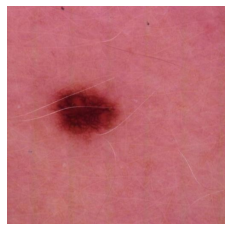

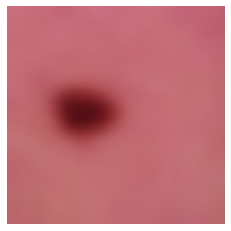

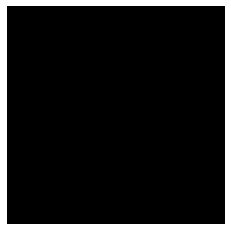

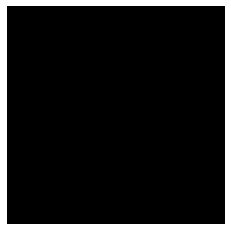

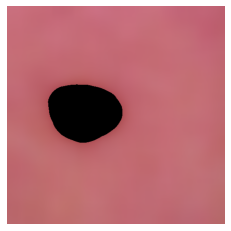

'Type III'

In [3]:
experiment(r'C:\Luna_CS\Melanoma 2020\---Full Validation Sets---\Skin Type\Normal\Type III\ISIC_0084395.jpg', full_path=True, show=True)

In [4]:
folder = r'C:\Luna_CS\Melanoma 2020\---Normal Validation Set---'
output = r'C:\Luna_CS\Melanoma 2020\---Full Validation Sets---\Skin Type\Normal'
for img in os.listdir(folder):
    path = os.path.join(folder, img)
    label = experiment(path, full_path=True, show=False)
    
    file = os.path.join(os.path.join(output, label), img)
    img = cv2.imread(path)
    cv2.imwrite(file, img)